<h1>ASSIGNMENT ON CLASSIFICATION</h1>

<h3>1. Read the dataset to python environment</h3>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_excel('iris.xls')

In [9]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>2. Do the necessary pre-processing steps</h3>


In [12]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

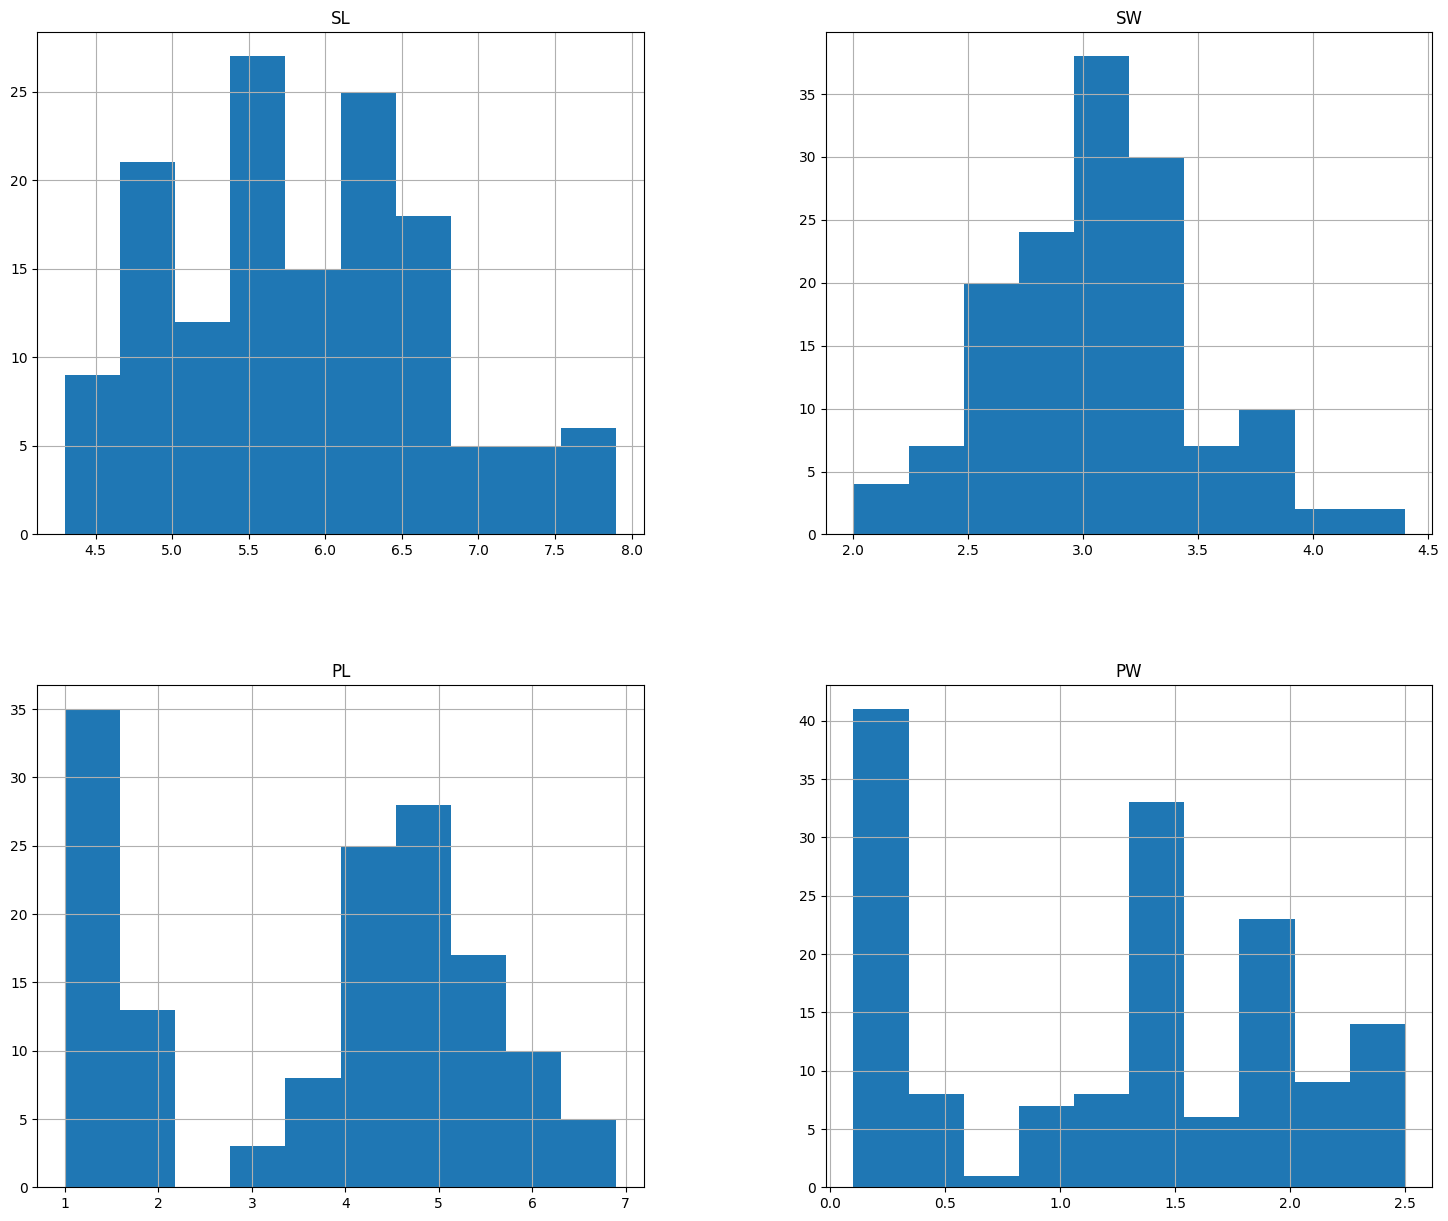

In [13]:
col_freq_graph=data.select_dtypes(include='float64')
col_freq_graph.hist(figsize=(18,15))

In [14]:
data['SW']=data['SW'].fillna(data['SW'].mean())
data['SL']=data['SL'].fillna(data['SL'].mean())
data['PW']=data['PW'].fillna(data['PW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.855944,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,4.35,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


<Axes: >

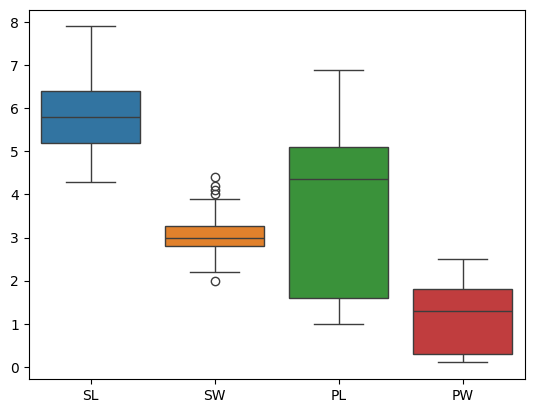

In [17]:
sns.boxplot(data)

<Axes: ylabel='SW'>

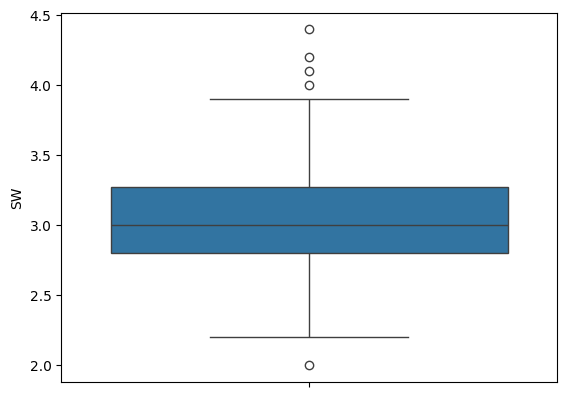

In [18]:
sns.boxplot(data['SW'])

<Axes: xlabel='SW', ylabel='Count'>

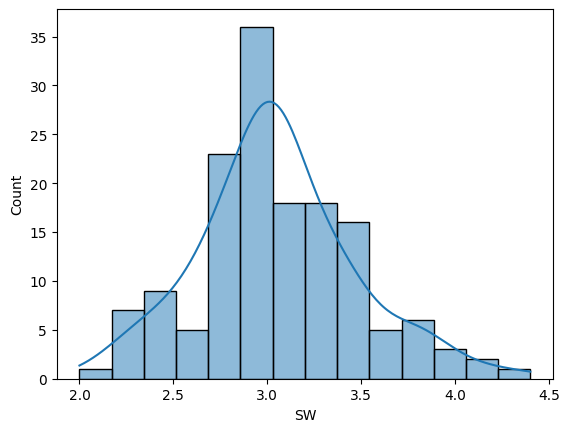

In [19]:
sns.histplot(data['SW'],kde=True)

In [20]:
q1=np.percentile(data['SW'],25)
q3=np.percentile(data['SW'],75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [21]:
outliers_index=data[(data['SW']>upper_limit) | (data['SW']<lower_limit)].index
outliers_index

Index([14, 15, 32, 33, 60], dtype='int64')

In [22]:
print(data['SW'].mean())

3.0493055555555557


In [23]:
data.iloc[outliers_index]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [24]:
sw_mean=data['SW'].mean()
for i in outliers_index:
  data.loc[i,'SW']=sw_mean

In [25]:
data.iloc[outliers_index]

,SL,SW,PL,PW,Classification
14,5.8,3.049306,1.2,0.2,Iris-setosa
15,5.7,3.049306,1.5,0.4,Iris-setosa
32,5.2,3.049306,1.5,0.1,Iris-setosa
33,5.5,3.049306,1.4,0.2,Iris-setosa
60,5.0,3.049306,3.5,1.0,Iris-versicolor


<Axes: ylabel='SW'>

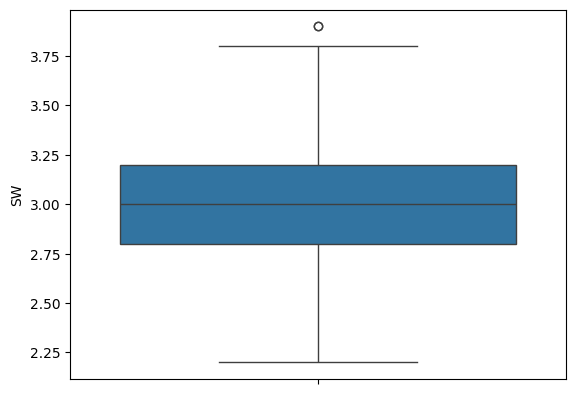

In [26]:
sns.boxplot(data['SW'])

In [27]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [28]:
X

,SL,SW,PL,PW
0,5.100000,3.5,1.40,0.2
1,4.900000,3.0,1.40,0.2
2,5.855944,3.2,1.30,0.2
3,4.600000,3.1,1.50,0.2
4,5.000000,3.6,1.40,0.2
...,...,...,...,...
145,6.700000,3.0,5.20,2.3
146,6.300000,2.5,5.00,1.9
147,6.500000,3.0,4.35,2.0
148,6.200000,3.4,5.40,2.3


In [29]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [31]:
X

array([[0.22222222, 0.76470588, 0.06779661, 0.04166667],
       [0.16666667, 0.47058824, 0.06779661, 0.04166667],
       [0.43220668, 0.58823529, 0.05084746, 0.04166667],
       [0.08333333, 0.52941176, 0.08474576, 0.04166667],
       [0.19444444, 0.82352941, 0.06779661, 0.04166667],
       [0.30555556, 1.        , 0.11864407, 0.125     ],
       [0.08333333, 0.70588235, 0.06779661, 0.08333333],
       [0.19444444, 0.70588235, 0.08474576, 0.04166667],
       [0.02777778, 0.41176471, 0.06779661, 0.04166667],
       [0.16666667, 0.52941176, 0.08474576, 0.        ],
       [0.30555556, 0.4995915 , 0.08474576, 0.04166667],
       [0.13888889, 0.70588235, 0.10169492, 0.04166667],
       [0.13888889, 0.47058824, 0.06779661, 0.        ],
       [0.        , 0.47058824, 0.01694915, 0.        ],
       [0.41666667, 0.4995915 , 0.03389831, 0.04166667],
       [0.38888889, 0.4995915 , 0.08474576, 0.125     ],
       [0.30555556, 1.        , 0.05084746, 0.125     ],
       [0.22222222, 0.76470588,

In [32]:
X=pd.DataFrame(X,columns=['SL', 'SW', 'PL', 'PW'])
X

,SL,SW,PL,PW
0,0.222222,0.764706,0.067797,0.041667
1,0.166667,0.470588,0.067797,0.041667
2,0.432207,0.588235,0.050847,0.041667
3,0.083333,0.529412,0.084746,0.041667
4,0.194444,0.823529,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.470588,0.711864,0.916667
146,0.555556,0.176471,0.677966,0.750000
147,0.611111,0.470588,0.567797,0.791667
148,0.527778,0.705882,0.745763,0.916667


SPLITTING

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<h3>3. Find out which classification model gives the best result</h3>


CREATING MODEL

LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
log_y_pred=lr_model.predict(X_test)


In [36]:
print("LOGISTIC REGRESSION\n")
print(f"Accuracy score  : {accuracy_score(y_test,log_y_pred)}")
print("-------------------------------------------\n")
print("Confusion_matrix")
print(confusion_matrix(y_test,log_y_pred))
print("\n-------------------------------------------\n")
print("Classification_report")
print(classification_report(y_test,log_y_pred))


LOGISTIC REGRESSION

Accuracy score  : 0.9736842105263158
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



SVM

In [37]:
from sklearn.svm import SVC

svc_model=SVC(kernel='linear',)
svc_model.fit(X_train,y_train)
svc_y_pred=svc_model.predict(X_test)

In [38]:
print("SVM MODEL\n")
print(f"Accuracy score  : {accuracy_score(y_test,svc_y_pred)}")
print("-------------------------------------------\n")
print("Confusion_matrix")
print(confusion_matrix(y_test,svc_y_pred))
print("\n-------------------------------------------\n")
print("Classification_report")
print(classification_report(y_test,svc_y_pred))


SVM MODEL

Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

acc_list=[]
for i in range(1,15):
  sample_model_knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  sample_model_knn.fit(X_train,y_train)
  sample_y_pred=sample_model_knn.predict(X_test)
  acc_list.append(accuracy_score(y_test,sample_y_pred))

In [40]:
acc_list

[0.9736842105263158,
 1.0,
 0.9736842105263158,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

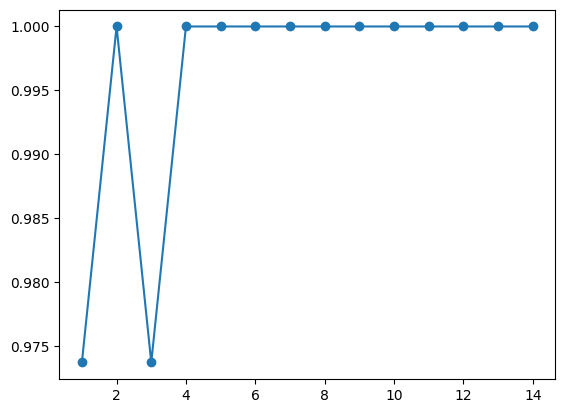

In [41]:
plt.plot(np.arange(1,15),acc_list,'-o')
plt.show()

In [42]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knn_y_pred=sample_model_knn.predict(X_test)


In [43]:
print("KNN\n")
print(f"Accuracy score  : {accuracy_score(y_test,knn_y_pred)}")
print("-------------------------------------------\n")
print("Confusion_matrix")
print(confusion_matrix(y_test,knn_y_pred))
print("\n-------------------------------------------\n")
print("Classification_report")
print(classification_report(y_test,knn_y_pred))


KNN

Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc_model=DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train,y_train)
dtc_y_pred=dtc_model.predict(X_test)

In [45]:
print("DECISION TREE\n")
print(f"Accuracy score  : {accuracy_score(y_test,dtc_y_pred)}")
print("-------------------------------------------\n")
print("Confusion_matrix")
print(confusion_matrix(y_test,dtc_y_pred))
print("\n-------------------------------------------\n")
print("Classification_report")
print(classification_report(y_test,dtc_y_pred))


DECISION TREE

Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



RANDOM FOREST ALGORITHM

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_y_pred=rfc_model.predict(X_test)

In [48]:
print("RANDOM FOREST\n")
print(f"Accuracy score  : {accuracy_score(y_test,rfc_y_pred)}")
print("-------------------------------------------\n")
print("Confusion_matrix")
print(confusion_matrix(y_test,rfc_y_pred))
print("\n-------------------------------------------\n")
print("Classification_report")
print(classification_report(y_test,rfc_y_pred))


RANDOM FOREST

Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



<h3>OBSERVATIONS</h3>
<pre>--------------------------------------------------------------</pre>

<h4><b>LOGISTIC REGRESSION</b></h4>

<pre>
Accuracy score  : 0.9736842105263158
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38
<pre>


<h4><b>SVM MODEL</b></h4>

<pre>
Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
</pre>

<h4><b>KNN</b></h4>

<pre>
Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
</pre>

<h4><b>DECISION TREE</b></h4>

<pre>
Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
</pre>

<h4><b>RANDOM FOREST</b></h4>

<pre>
Accuracy score  : 1.0
-------------------------------------------

Confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

-------------------------------------------

Classification_report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
</pre>

<pre>--------------------------------------------------------------</pre>

<h3>INFERENCE</h3>
<h4>
All models <b>(KNN,SVM,Decision Tree,Random Forest)</b> perform well, achieving an accuracy score of <b>1 (100%)</b><br>
<b>Logistic Regression</b>, while not achieving a perfect score, still performs very well with an accuracy of </b>0.97 (97%), which is very close to 1.
<h4>